# 09 - Classificando patologias em toras usando combinação de `LBP + SVM`

> redefinindo classes de patologias como uma só

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern

# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

## Processando imagens

In [2]:
path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile('./patologias_toras.zip') as zip_file:
  for path in zip_file.namelist():
    # a pasta de cada amostra é o segundo elemento do split
    folder = path.split('/')[1]
    # Separando amostras por classe
    if folder in TARGET_NAMES:
      path_dict[folder].append(f'./patologias_toras.zip/{path}')


# Mostrando quantidade de amostras por classe
qtd_amostras_p_classe = []
for target in path_dict:
  n_amostras = len(path_dict[target])
  print(f'{target}: {n_amostras} amostras')

  qtd_amostras_p_classe.append(n_amostras)

N_MIN_DE_AMOSTRAS = min(qtd_amostras_p_classe)
amostra = []

for target_name in TARGET_NAMES:
  path_list = path_dict[target_name]
  path_list_slice = path_list[:N_MIN_DE_AMOSTRAS]
  
  for path in path_list_slice:
    img = io.imread(path, as_gray=True)
    
    lbp = local_binary_pattern(image=img, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
    
    hist = pd.Series(lbp).value_counts().sort_index()
    arr = np.zeros(59)
    for i in hist.index:
      arr[int(i)] = hist[i]

    df = pd.DataFrame(data=[arr])
    df['target'] = TARGET_NAMES[target_name]
    amostra.append(df)

data = pd.concat(amostra, ignore_index=True)
data.to_csv('./csvs/bin-lbp_toras.csv')
data

normal: 107 amostras
broca: 90 amostras
fissura: 109 amostras
musgo: 111 amostras


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,target
0,17737.0,5885.0,726.0,4301.0,916.0,6137.0,816.0,4633.0,907.0,2591.0,...,4011.0,1400.0,5076.0,1184.0,3869.0,1428.0,5201.0,21203.0,35941.0,0
1,18181.0,6080.0,840.0,4380.0,831.0,6234.0,814.0,4540.0,733.0,2045.0,...,3776.0,1145.0,5133.0,1249.0,3626.0,1091.0,5214.0,19367.0,34279.0,0
2,16913.0,6958.0,711.0,3244.0,860.0,7252.0,735.0,3315.0,831.0,2365.0,...,2957.0,1423.0,5950.0,1181.0,2696.0,1329.0,6002.0,19651.0,34041.0,0
3,20334.0,7594.0,937.0,4483.0,1066.0,7806.0,912.0,4693.0,915.0,2597.0,...,4046.0,1436.0,6926.0,1355.0,4068.0,1367.0,6752.0,23403.0,40270.0,0
4,20264.0,7912.0,869.0,4683.0,1005.0,8048.0,891.0,4605.0,930.0,2507.0,...,4031.0,1245.0,6977.0,1155.0,4177.0,1289.0,6944.0,22119.0,39074.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,996.0,432.0,43.0,203.0,50.0,427.0,40.0,184.0,54.0,199.0,...,159.0,58.0,335.0,56.0,168.0,76.0,337.0,1172.0,2029.0,3
356,3441.0,1093.0,162.0,812.0,171.0,1091.0,155.0,796.0,153.0,506.0,...,778.0,213.0,920.0,204.0,759.0,206.0,890.0,3818.0,6821.0,3
357,1579.0,592.0,63.0,360.0,73.0,622.0,55.0,334.0,66.0,254.0,...,332.0,123.0,472.0,76.0,300.0,121.0,484.0,1687.0,3122.0,3
358,4216.0,1478.0,183.0,902.0,220.0,1474.0,193.0,854.0,176.0,688.0,...,936.0,276.0,1250.0,238.0,866.0,305.0,1316.0,4765.0,8434.0,3


In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             f1_score,
                             plot_confusion_matrix)

## Realizando 30 rodadas de classificação

Rodada 0	-	Seed 1745
              precision    recall  f1-score   support

      normal       0.70      0.86      0.78        22
   patologia       0.89      0.75      0.81        32

    accuracy                           0.80        54
   macro avg       0.80      0.81      0.79        54
weighted avg       0.81      0.80      0.80        54



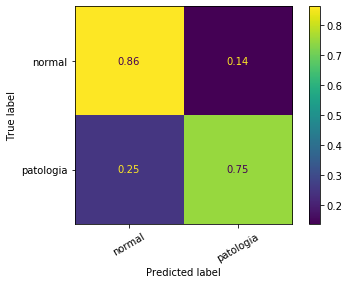

Rodada 1	-	Seed 377
              precision    recall  f1-score   support

      normal       0.71      0.92      0.80        24
   patologia       0.91      0.70      0.79        30

    accuracy                           0.80        54
   macro avg       0.81      0.81      0.80        54
weighted avg       0.82      0.80      0.80        54



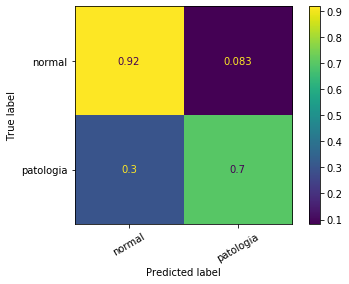

Rodada 2	-	Seed 498
              precision    recall  f1-score   support

      normal       0.78      0.84      0.81        25
   patologia       0.85      0.79      0.82        29

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



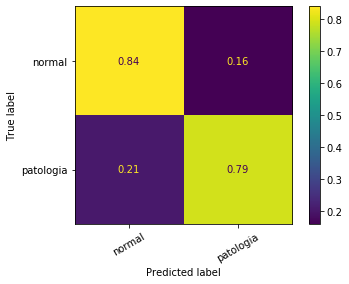

Rodada 3	-	Seed 7359
              precision    recall  f1-score   support

      normal       0.79      0.88      0.84        26
   patologia       0.88      0.79      0.83        28

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



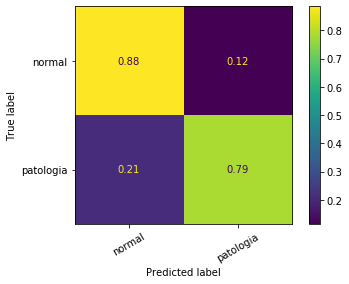

Rodada 4	-	Seed 3117
              precision    recall  f1-score   support

      normal       0.81      0.93      0.86        27
   patologia       0.91      0.78      0.84        27

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



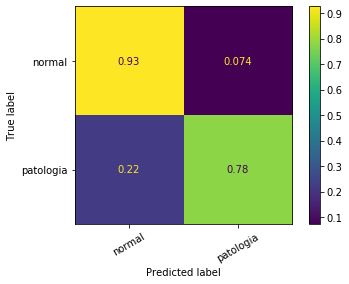

Rodada 5	-	Seed 5934
              precision    recall  f1-score   support

      normal       0.74      1.00      0.85        20
   patologia       1.00      0.79      0.89        34

    accuracy                           0.87        54
   macro avg       0.87      0.90      0.87        54
weighted avg       0.90      0.87      0.87        54



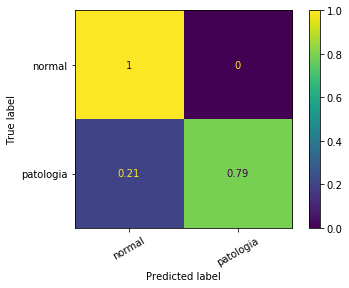

Rodada 6	-	Seed 7731
              precision    recall  f1-score   support

      normal       0.64      0.64      0.64        22
   patologia       0.75      0.75      0.75        32

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



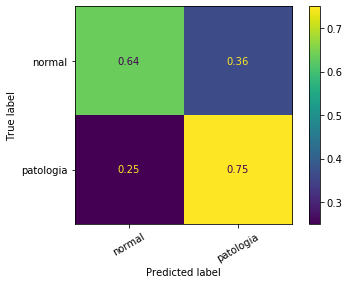

Rodada 7	-	Seed 288
              precision    recall  f1-score   support

      normal       0.83      0.96      0.89        26
   patologia       0.96      0.82      0.88        28

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



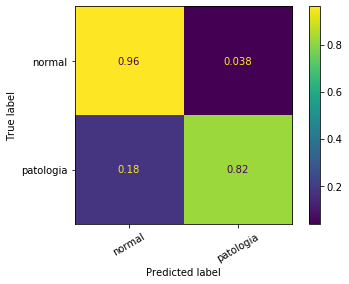

Rodada 8	-	Seed 5269
              precision    recall  f1-score   support

      normal       0.86      0.86      0.86        29
   patologia       0.84      0.84      0.84        25

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



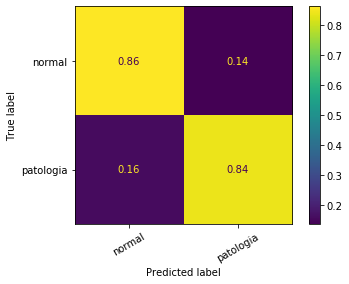

Rodada 9	-	Seed 5977
              precision    recall  f1-score   support

      normal       0.85      0.85      0.85        26
   patologia       0.86      0.86      0.86        28

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



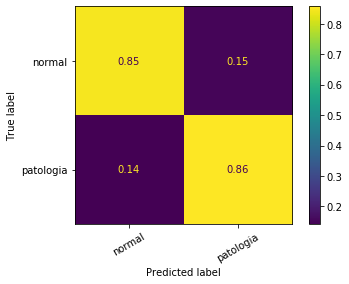

Rodada 10	-	Seed 2986
              precision    recall  f1-score   support

      normal       0.92      0.77      0.84        31
   patologia       0.75      0.91      0.82        23

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



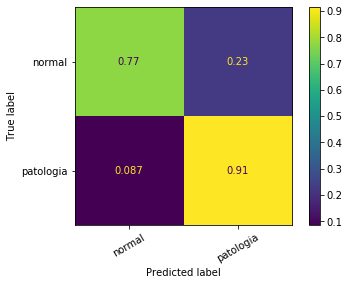

Rodada 11	-	Seed 1035
              precision    recall  f1-score   support

      normal       0.88      1.00      0.93        28
   patologia       1.00      0.85      0.92        26

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.94      0.93      0.93        54



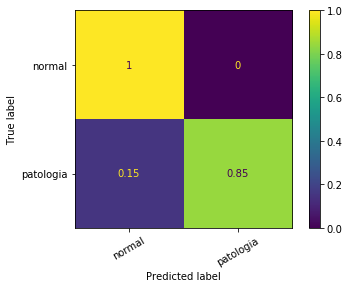

Rodada 12	-	Seed 7744
              precision    recall  f1-score   support

      normal       0.84      0.96      0.90        27
   patologia       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



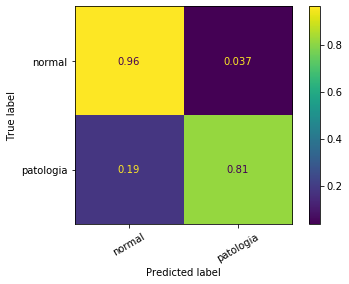

Rodada 13	-	Seed 186
              precision    recall  f1-score   support

      normal       0.85      0.82      0.84        28
   patologia       0.81      0.85      0.83        26

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



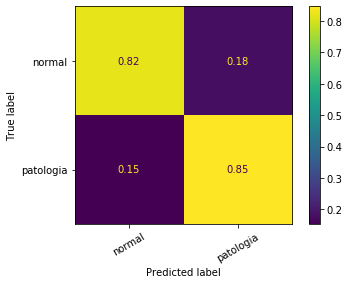

Rodada 14	-	Seed 4626
              precision    recall  f1-score   support

      normal       0.86      0.86      0.86        28
   patologia       0.85      0.85      0.85        26

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



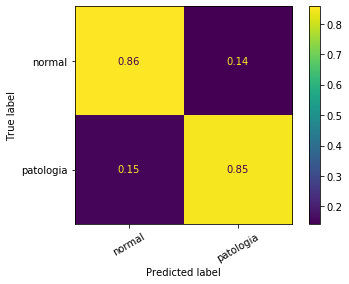

Rodada 15	-	Seed 6031
              precision    recall  f1-score   support

      normal       0.93      0.84      0.89        32
   patologia       0.80      0.91      0.85        22

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



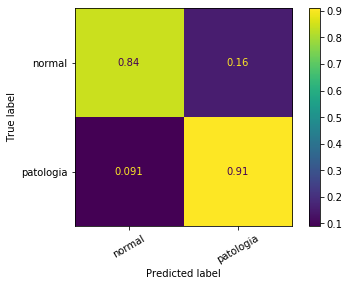

Rodada 16	-	Seed 6456
              precision    recall  f1-score   support

      normal       0.86      0.89      0.87        27
   patologia       0.88      0.85      0.87        27

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



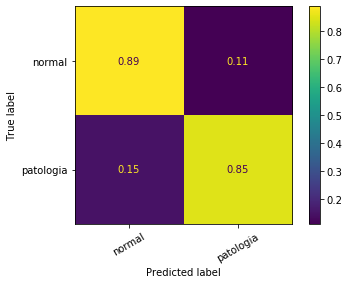

Rodada 17	-	Seed 2362
              precision    recall  f1-score   support

      normal       0.87      0.74      0.80        27
   patologia       0.77      0.89      0.83        27

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



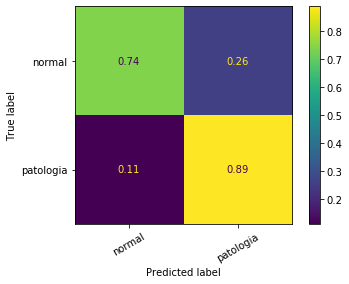

Rodada 18	-	Seed 5473
              precision    recall  f1-score   support

      normal       0.69      0.88      0.77        25
   patologia       0.86      0.66      0.75        29

    accuracy                           0.76        54
   macro avg       0.78      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54



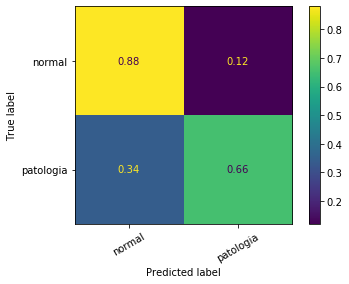

Rodada 19	-	Seed 7463
              precision    recall  f1-score   support

      normal       0.79      0.96      0.86        23
   patologia       0.96      0.81      0.88        31

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.89      0.87      0.87        54



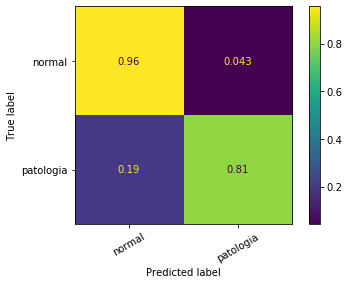

Rodada 20	-	Seed 5186
              precision    recall  f1-score   support

      normal       0.89      0.89      0.89        27
   patologia       0.89      0.89      0.89        27

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



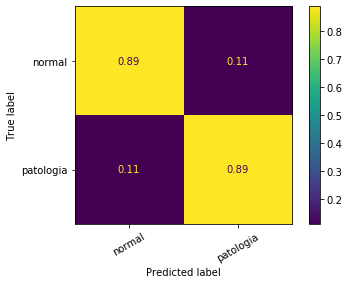

Rodada 21	-	Seed 7448
              precision    recall  f1-score   support

      normal       0.80      0.89      0.84        27
   patologia       0.88      0.78      0.82        27

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54



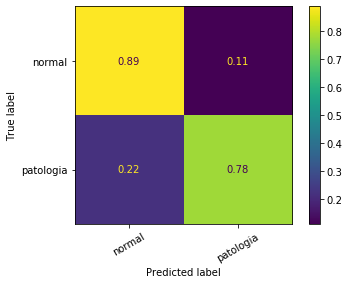

Rodada 22	-	Seed 2024
              precision    recall  f1-score   support

      normal       0.72      0.81      0.76        26
   patologia       0.80      0.71      0.75        28

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



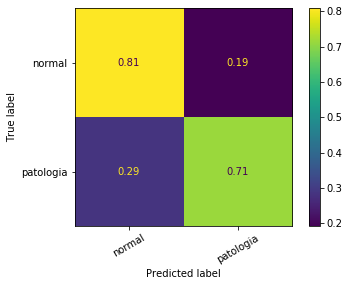

Rodada 23	-	Seed 4500
              precision    recall  f1-score   support

      normal       0.90      0.88      0.89        32
   patologia       0.83      0.86      0.84        22

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



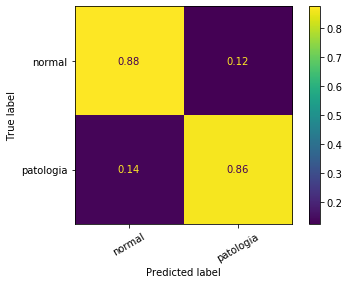

Rodada 24	-	Seed 3892
              precision    recall  f1-score   support

      normal       0.73      0.92      0.81        24
   patologia       0.92      0.73      0.81        30

    accuracy                           0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.84      0.81      0.81        54



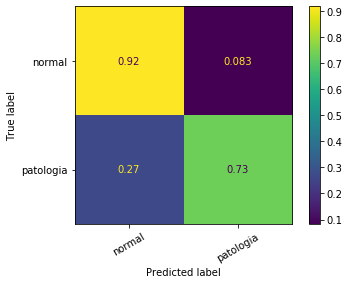

Rodada 25	-	Seed 5192
              precision    recall  f1-score   support

      normal       0.86      0.89      0.87        27
   patologia       0.88      0.85      0.87        27

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



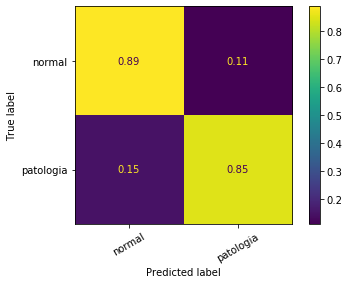

Rodada 26	-	Seed 5421
              precision    recall  f1-score   support

      normal       0.83      0.78      0.81        32
   patologia       0.71      0.77      0.74        22

    accuracy                           0.78        54
   macro avg       0.77      0.78      0.77        54
weighted avg       0.78      0.78      0.78        54



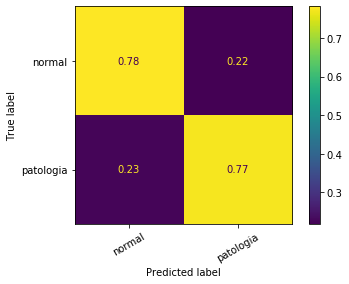

Rodada 27	-	Seed 6278
              precision    recall  f1-score   support

      normal       0.80      0.83      0.81        29
   patologia       0.79      0.76      0.78        25

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



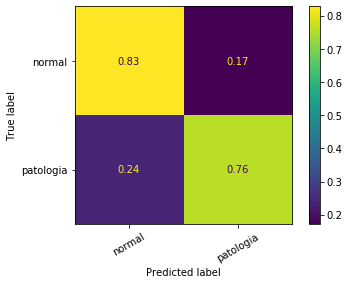

Rodada 28	-	Seed 4171
              precision    recall  f1-score   support

      normal       0.72      0.88      0.79        26
   patologia       0.86      0.68      0.76        28

    accuracy                           0.78        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.79      0.78      0.78        54



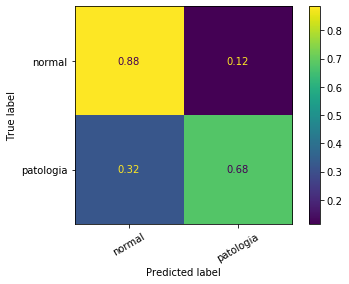

Rodada 29	-	Seed 2664
              precision    recall  f1-score   support

      normal       0.79      0.76      0.77        29
   patologia       0.73      0.76      0.75        25

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



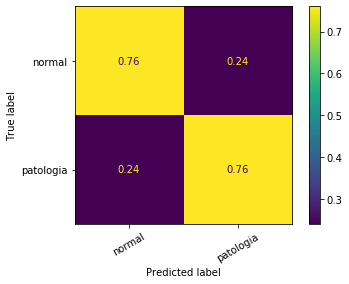

In [4]:
TARGET_NAMES = ['normal', 'patologia']
df = pd.read_csv('./csvs/bin-lbp_toras.csv')

df_list = []
for target, dataframe in df.groupby('target'):
  l = len(dataframe)
  if target != 0:
    l //= 3
  df_list.append(dataframe.head(l))

df = pd.concat(df_list, ignore_index=True)
y = df.pop('target').values

# valores em y diferentes de 0 se tornam 1
y[y!=0] = 1
X = df.values

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)

acc_e_f1_por_rodada = []
confu_matrices = []

for rodada, seed in enumerate(seed_arr):
  # separando dados
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

  clf = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  # Adicionando resultados à respectiva lista
  acc_e_f1_por_rodada.append(
    [accuracy_score(y_test, y_pred)]
    + list(f1_score(y_test, y_pred, average=None)))

  confu_matrices.append(
    confusion_matrix(y_test, y_pred, normalize='true'))

  print(f'Rodada {rodada}\t-\tSeed {seed}')
  print(
    classification_report(
      y_true=y_test,
      y_pred=y_pred,
      target_names=TARGET_NAMES))

  plot_confusion_matrix(
    estimator=clf,
    X=X_test,
    y_true=y_test,
    display_labels=TARGET_NAMES,
    xticks_rotation=30,
    normalize='true')
  
  plt.show()

## Métricas do experimento

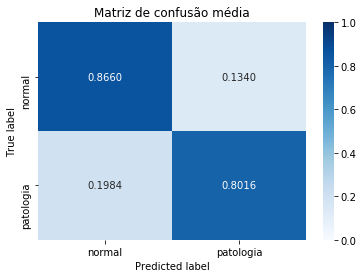

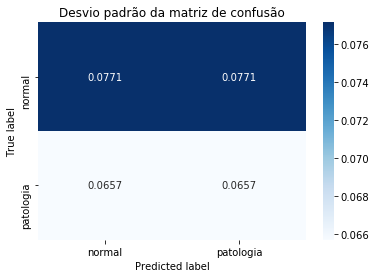

In [5]:
confusion_matrix_mean = np.mean(confu_matrices, axis=0)
confusion_matrix_std = np.std(confu_matrices, axis=0)

sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_NAMES,
    yticklabels=TARGET_NAMES
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

plt.show()

sns.heatmap(
    data=confusion_matrix_std,
    cmap='Blues',
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_std == 0,
    xticklabels=TARGET_NAMES,
    yticklabels=TARGET_NAMES
    ).set(
        title='Desvio padrão da matriz de confusão',
        xlabel='Predicted label',
        ylabel='True label')

None

        Acurácia  f1-normal  f1-patologia
count  30.000000  30.000000     30.000000
mean    0.830864   0.832813      0.826470
std     0.049770   0.056852      0.049403
min     0.703704   0.636364      0.739130
25%     0.796296   0.801613      0.797729
50%     0.833333   0.842105      0.830189
75%     0.870370   0.870232      0.865229
max     0.925926   0.933333      0.916667


Acurácia,f1-normal,f1-patologia
0.796296,0.775510,0.813559
0.796296,0.800000,0.792453
0.814815,0.807692,0.821429
0.833333,0.836364,0.830189
0.851852,0.862069,0.840000
0.870370,0.851064,0.885246
0.703704,0.636364,0.750000
0.888889,0.892857,0.884615
0.851852,0.862069,0.840000
0.851852,0.846154,0.857143


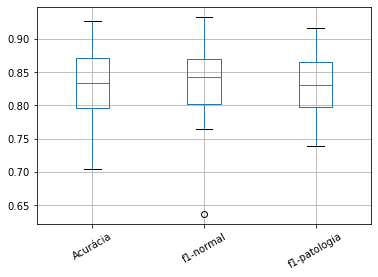

In [6]:
acc_df = pd.DataFrame(
  data=acc_e_f1_por_rodada,
  columns=['Acurácia'] + [f'f1-{name}' for name in TARGET_NAMES])

print(acc_df.describe())

acc_df.boxplot(rot=30)

acc_df.style.hide_index().background_gradient(cmap='Blues')